In [1]:
import context
from models.diffusion import DiffusionModel, ForwardDiffusion
from models.positional_encoding import PositionalEncoding
from models.unet import UNet
from utils.trainer import GenerativeTrainer
from utils.datasets import MNISTTrainDataset
import torch
import matplotlib.pyplot as plt

In [2]:
fwd = ForwardDiffusion(timesteps=1000)
unet = UNet(num_encoding_blocks=4, in_channels=1)
ddpm = DiffusionModel(backbone=unet, fwd_diff=fwd, img_size=32)

In [6]:
total = 0
for param in unet.parameters():
    total += torch.prod(torch.tensor(param.shape))

In [3]:
ddpm.load_state_dict(torch.load("./data/checkpoint290.pt", map_location=torch.device('cpu')), strict=False)
ddpm.time_encoder = PositionalEncoding(dropout=0)

In [4]:
ddpm.eval()
with torch.no_grad():
    samples = ddpm.sample(num_samples=2)

In [5]:
samples.shape

torch.Size([2, 1, 32, 32])

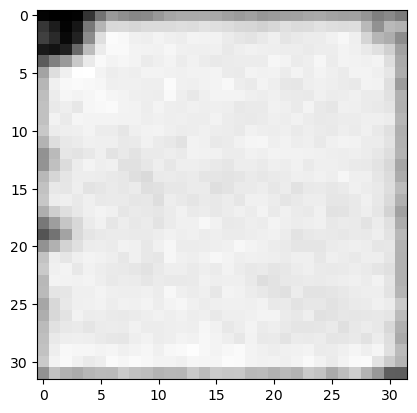

In [6]:
plt.imshow(samples[0].permute(1,2,0), cmap="gray")

In [18]:
dl = torch.utils.data.DataLoader(MNISTTrainDataset("./data/"), batch_size=100)

In [19]:
x, y = next(iter(dl))

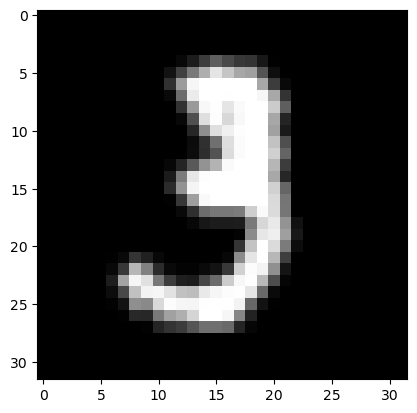

In [31]:
plt.imshow(x[10].permute(1,2,0), cmap="gray")